In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Sentiment Analysis

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from textblob import TextBlob
from nltk.util import ngrams
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.model_selection import cross_val_score



from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [43]:
biden_df=pd.read_csv(r"C:\Users\karth\Downloads\hashtag_donaldtrump_joebiden.csv\hashtag_joebiden.csv",encoding='ISO-8859-1',lineterminator='\n')

In [44]:
biden_df.head(2)

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,ð Noticias de interÃ©s para latinos de la c...,...,1860.0,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,809904438.0,Cheri A. ðºð¸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283


In [45]:
trump_df=pd.read_csv(r"C:\Users\karth\Downloads\hashtag_donaldtrump_joebiden.csv\hashtag_donaldtrump.csv",encoding='ISO-8859-1',engine='python')

In [46]:
trump_df.head(2)

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,ð Noticias de interÃ©s para latinos de la c...,...,1860.0,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.3165292227484303e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,331617619.0,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530


In [47]:
print(trump_df.shape)



(971087, 21)


In [48]:
print(biden_df.shape)

(776886, 21)


In [49]:
print(trump_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971087 entries, 0 to 971086
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            971087 non-null  object 
 1   tweet_id              971073 non-null  object 
 2   tweet                 971073 non-null  object 
 3   likes                 971045 non-null  object 
 4   retweet_count         970933 non-null  float64
 5   source                970057 non-null  object 
 6   user_id               970929 non-null  object 
 7   user_name             970917 non-null  object 
 8   user_screen_name      970933 non-null  object 
 9   user_description      869663 non-null  object 
 10  user_join_date        970779 non-null  object 
 11  user_followers_count  970917 non-null  object 
 12  user_location         675839 non-null  object 
 13  lat                   445702 non-null  object 
 14  long                  445705 non-null  object 
 15  

In [50]:
print(biden_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776868 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694880 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543095 non-null  object 
 13  lat                   355293 non-null  float64
 14  long                  355293 non-null  float64
 15  

# Data preprocessing & Cleaning

In [51]:
trump_df.dtypes

created_at               object
tweet_id                 object
tweet                    object
likes                    object
retweet_count           float64
source                   object
user_id                  object
user_name                object
user_screen_name         object
user_description         object
user_join_date           object
user_followers_count     object
user_location            object
lat                      object
long                     object
city                     object
country                  object
continent                object
state                    object
state_code               object
collected_at             object
dtype: object

In [52]:
trump_df.isnull().sum()

created_at                   0
tweet_id                    14
tweet                       14
likes                       42
retweet_count              154
source                    1030
user_id                    158
user_name                  170
user_screen_name           154
user_description        101424
user_join_date             308
user_followers_count       170
user_location           295248
lat                     525385
long                    525382
city                    743907
country                 528355
continent               528338
state                   650473
state_code              670673
collected_at               322
dtype: int64

In [53]:
trump_df = trump_df.dropna(axis = 0, how = 'any') #it will remove all rows containing 'any' value as null(at least one)

In [54]:
trump_df.isnull().sum()

created_at              0
tweet_id                0
tweet                   0
likes                   0
retweet_count           0
source                  0
user_id                 0
user_name               0
user_screen_name        0
user_description        0
user_join_date          0
user_followers_count    0
user_location           0
lat                     0
long                    0
city                    0
country                 0
continent               0
state                   0
state_code              0
collected_at            0
dtype: int64

In [55]:
print(len(trump_df))

189268


In [56]:
biden_df.dtypes

created_at               object
tweet_id                float64
tweet                    object
likes                   float64
retweet_count           float64
source                   object
user_id                 float64
user_name                object
user_screen_name         object
user_description         object
user_join_date           object
user_followers_count    float64
user_location            object
lat                     float64
long                    float64
city                     object
country                  object
continent                object
state                    object
state_code               object
collected_at             object
dtype: object

In [57]:
biden_df.isna().sum()

created_at                   0
tweet_id                     0
tweet                        0
likes                        0
retweet_count                0
source                     713
user_id                      0
user_name                   18
user_screen_name             0
user_description         82006
user_join_date               0
user_followers_count         0
user_location           233791
lat                     421593
long                    421593
city                    590014
country                 423107
continent               423089
state                   516691
state_code              532277
collected_at                 0
dtype: int64

In [58]:
biden_df = biden_df.dropna(axis = 0, how = 'any') #it will remove all rows containing 'any' value as null(at least one)

In [59]:
biden_df.isna().sum()

created_at              0
tweet_id                0
tweet                   0
likes                   0
retweet_count           0
source                  0
user_id                 0
user_name               0
user_screen_name        0
user_description        0
user_join_date          0
user_followers_count    0
user_location           0
lat                     0
long                    0
city                    0
country                 0
continent               0
state                   0
state_code              0
collected_at            0
dtype: int64

In [60]:
print(len(biden_df))

155950


In [61]:
# Adding a new column to differentiate between tweets of Biden and Trump
trump_df["Candidate"] = "TRUMP"
biden_df["Candidate"] = "BIDEN"

In [21]:
# Concat the data frames
Data_Mixed = pd.concat([trump_df,biden_df])
Data_Mixed.sort_values(by='created_at')
Data_Mixed.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,Candidate
2,2020-10-15 00:00:02,1.316529228091847e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.5202471,-122.6741949,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,TRUMP
4,2020-10-15 00:00:08,1.3165292523014513e+18,You get a tie! And you get a tie! #Trump âs ...,4.0,3.0,Twitter for iPhone,47413798.0,Rana Abtar - Ø±ÙØ§ Ø£Ø¨ØªØ±,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,Washington DC,38.8949924,-77.0365581,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,TRUMP
11,2020-10-15 00:00:25,1.3165293244182405e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,19940334.0,Change Illinois | Biden will increase taxes by...,changeillinois,"Illinois, home of Lincoln and Reagan, used to ...",...,"Chicago, Illinois",41.875561600000005,-87.6244212,Chicago,United States of America,North America,Illinois,IL,2020-10-21 00:00:04.105381834,TRUMP
12,2020-10-15 00:00:26,1.3165293286084813e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.2433153463979663e+18,Ron Burgundy,Anchorman_USA,"I'm kind of a Big Deal, People know me! I driv...",...,"San Diego, CA",32.7174209,-117.16277140000001,San Diego,United States of America,North America,California,CA,2020-10-21 00:00:04.478598364,TRUMP
13,2020-10-15 00:00:31,1.316529349290586e+18,@Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...,2.0,0.0,Twitter Web App,343956175.0,Sebastian White,SebWrites,"Tortured, literary genius, well probably the f...",...,Edinburgh ~ Heart of Scotland!,55.9533456,-3.1883749,City of Edinburgh,United Kingdom,Europe,Scotland,SCT,2020-10-21 00:00:05.225031425,TRUMP


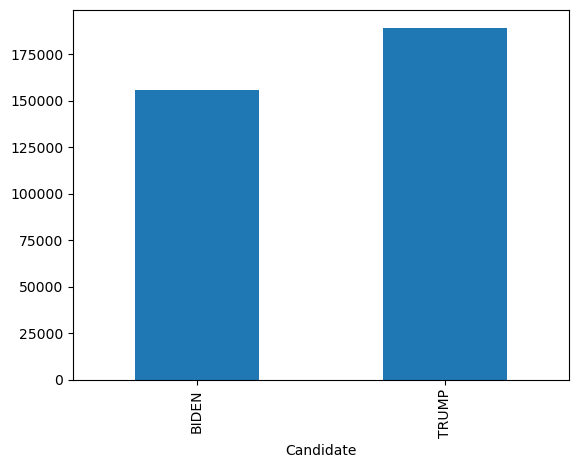

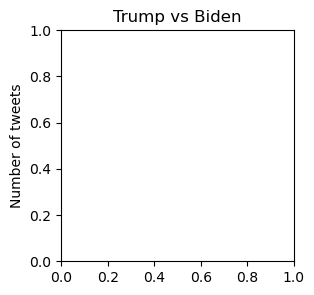

In [22]:
# Plot the number of tweets for each candidate
Data_Mixed.groupby('Candidate')['tweet'].count().plot.bar()
plt.figure(figsize=(3,3))
plt.ylabel('Number of tweets')
plt.title('Trump vs Biden')
plt.show()

In [23]:
Data_Mixed.groupby('Candidate')['tweet'].count()

Candidate
BIDEN    155950
TRUMP    189268
Name: tweet, dtype: int64

In [24]:
Data_Mixed['likes'] = pd.to_numeric(Data_Mixed['likes'], errors='coerce')
Data_Mixed.groupby('Candidate')['likes'].sum()

Candidate
BIDEN    2736568.0
TRUMP    2267705.0
Name: likes, dtype: float64

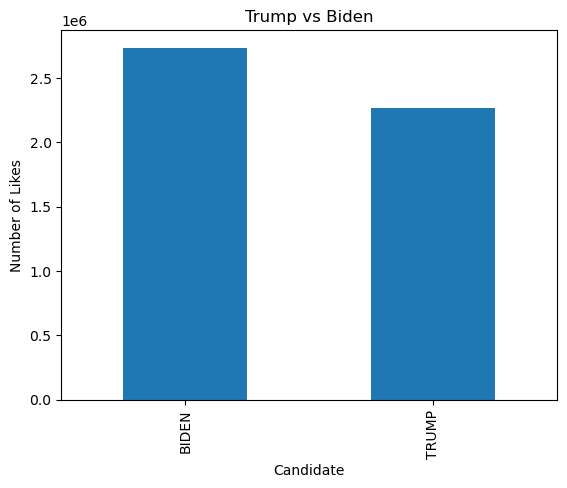

In [25]:
# Comparison of likes
Data_Mixed.groupby('Candidate')['likes'].sum().plot.bar()
plt.ylabel('Number of Likes')
plt.title('Trump vs Biden')
plt.show()

In [26]:
#Even though The number of tweets for Trump are high but the number of likes are high for BIDEN showing that there are was more talk about biden than trump

In [27]:
Data_Mixed.country.value_counts()

United States of America    182383
United Kingdom               31868
India                        20932
France                       19990
Germany                      18534
Canada                       16250
The Netherlands               8491
Australia                     8330
Spain                         5253
Brazil                        4211
Pakistan                      3704
Italy                         2966
Ireland                       2587
Bangladesh                    2036
Mexico                        1972
Belgium                       1962
Nigeria                       1848
South Africa                  1648
United Arab Emirates          1521
Switzerland                   1494
Peru                          1031
Lebanon                       1002
Argentina                      872
Ecuador                        824
Colombia                       565
Honduras                       508
Venezuela                      431
New Zealand                    384
Poland              

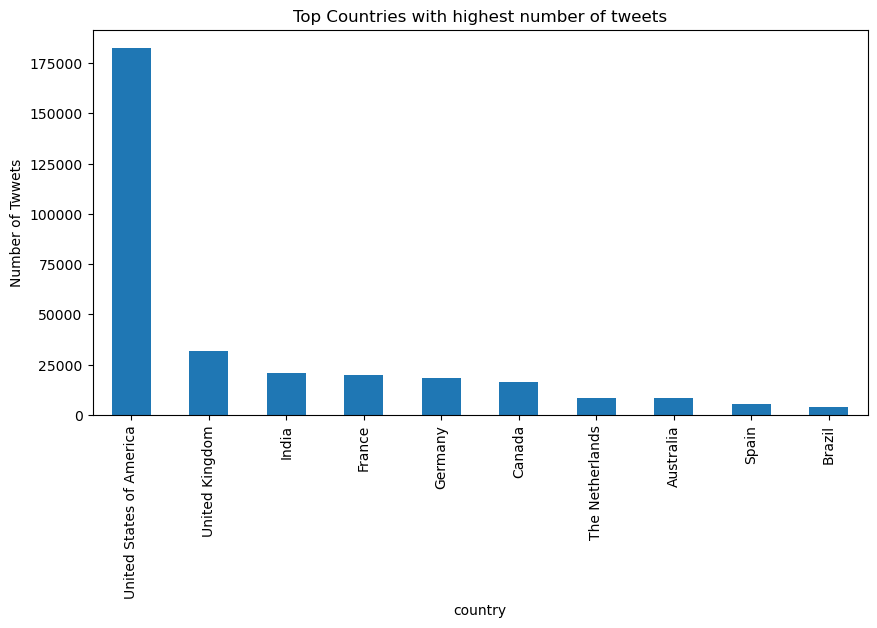

In [28]:
# Countries with highest number of tweets
plt.figure(figsize=(10,5))
Data_Mixed.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Number of Twwets')
plt.title('Top Countries with highest number of tweets')
plt.show()

In [29]:
#As Expected more Tweets are from US, as elections are being conducted there

In [30]:
# List of top 10 countries with highest number of tweets
top10Countries = Data_Mixed.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()

In [31]:
# Twwets for Biden and Trump from each country
tweet_df = Data_Mixed.groupby(['country','Candidate'])['tweet'].count().reset_index()

tweet_df = tweet_df[tweet_df['country'].isin(top10Countries)]

tweet_df.head()

,country,Candidate,tweet
2,Australia,BIDEN,3181
3,Australia,TRUMP,5149
10,Brazil,BIDEN,2063
11,Brazil,TRUMP,2148
15,Canada,BIDEN,6011


In [32]:
Trump_Tweets = Data_Mixed.query('(Candidate == "TRUMP")').sort_values('user_followers_count',ascending = False).drop_duplicates(['user_name'])[['tweet','country','likes','retweet_count','user_followers_count']]
Biden_Tweets = Data_Mixed.query('(Candidate == "BIDEN")').dropna(subset=['country']).sort_values('user_followers_count', ascending=False).drop_duplicates(['user_name'])[['tweet','country','likes','retweet_count','user_followers_count']]

In [33]:
#Lets check the comparison of tweets for Biden and Trumo for the top countries

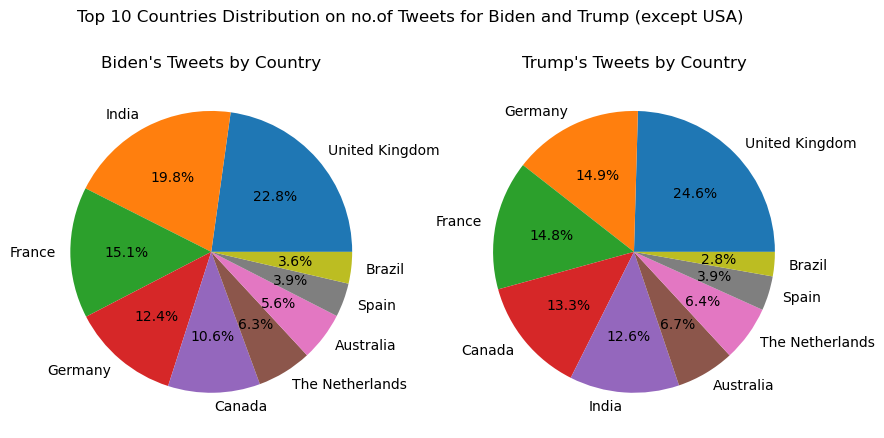

In [34]:
# group the data by candidate and country, count the number of tweets per country
tweet_c1 = Data_Mixed.groupby(['Candidate', 'country'])['tweet'].count().reset_index()
tweet_c1 = tweet_c1.sort_values(by='tweet', ascending=False)

biden_tweets = tweet_c1[tweet_c1['Candidate'] == 'BIDEN'].head(10)
biden_tweets=biden_tweets.loc[biden_tweets.country != 'United States of America']

trump_tweets = tweet_c1[tweet_c1['Candidate'] == 'TRUMP'].head(10)
trump_tweets=trump_tweets.loc[trump_tweets.country != 'United States of America']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# plot a pie chart for Biden's tweets in the first subplot
ax[0].pie(biden_tweets['tweet'], labels=biden_tweets['country'], autopct='%1.1f%%')
ax[0].set_title("Biden's Tweets by Country")
# plot a pie chart for Trump's tweets in the second subplot
ax[1].pie(trump_tweets['tweet'], labels=trump_tweets['country'], autopct='%1.1f%%')
ax[1].set_title("Trump's Tweets by Country")
fig.suptitle('Top 10 Countries Distribution on no.of Tweets for Biden and Trump (except USA)')
plt.show()

In [35]:
tweet_c = Data_Mixed.groupby(['Candidate', 'user_id'])['tweet'].count().reset_index()

C:\Users\karth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


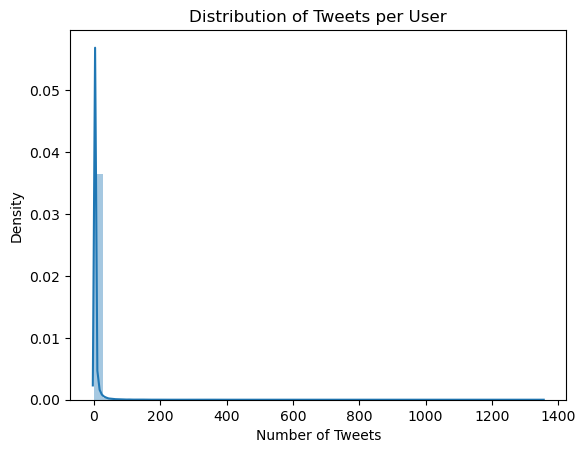

In [36]:
sns.distplot(tweet_c['tweet'])
plt.xlabel('Number of Tweets')
plt.ylabel('Density')
plt.title('Distribution of Tweets per User')
plt.show()

In [37]:
# convert the 'created_at' column to datetime format
Data_Mixed['created_at'] = pd.to_datetime(Data_Mixed['created_at'])

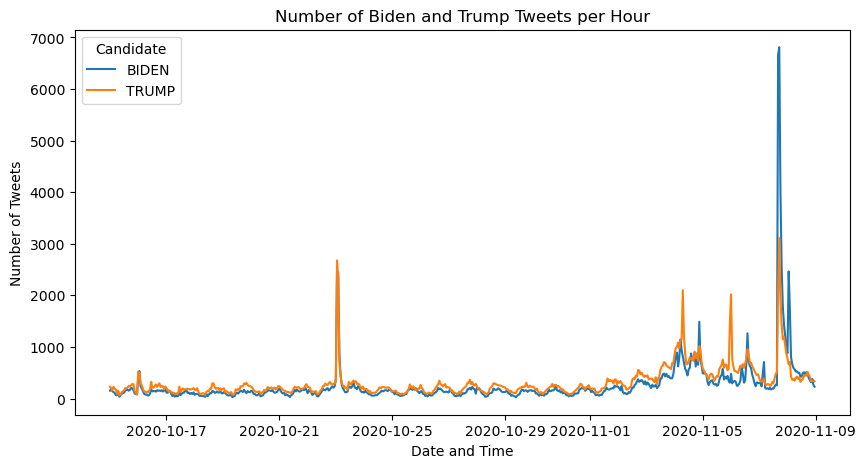

In [38]:
# group the data by candidate and by hour, and count the number of tweets in each group
tweet_cts = Data_Mixed.groupby(['Candidate', pd.Grouper(key='created_at', freq='H')])['tweet'].count().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=tweet_cts, x='created_at', y='tweet', hue='Candidate')
plt.xlabel('Date and Time')
plt.ylabel('Number of Tweets')
plt.title('Number of Biden and Trump Tweets per Hour')
plt.show()

In [39]:
# List of top 10 states with highest number of tweets
top10States = Data_Mixed.groupby('state')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()

In [40]:
top10States

['New York',
 'California',
 'England',
 'District of Columbia',
 'Ile-de-France',
 'Texas',
 'Florida',
 'Ontario',
 'Illinois',
 'Berlin']

In [41]:
# Twwets for Biden and Trump from each state in top10 states
state_df = Data_Mixed.groupby(['state','Candidate'])['tweet'].count().reset_index()

state_df = state_df[state_df['state'].isin(top10States)]

state_df.head()

,state,Candidate,tweet
70,Berlin,BIDEN,2858
71,Berlin,TRUMP,4291
91,California,BIDEN,15960
92,California,TRUMP,18672
151,District of Columbia,BIDEN,6715


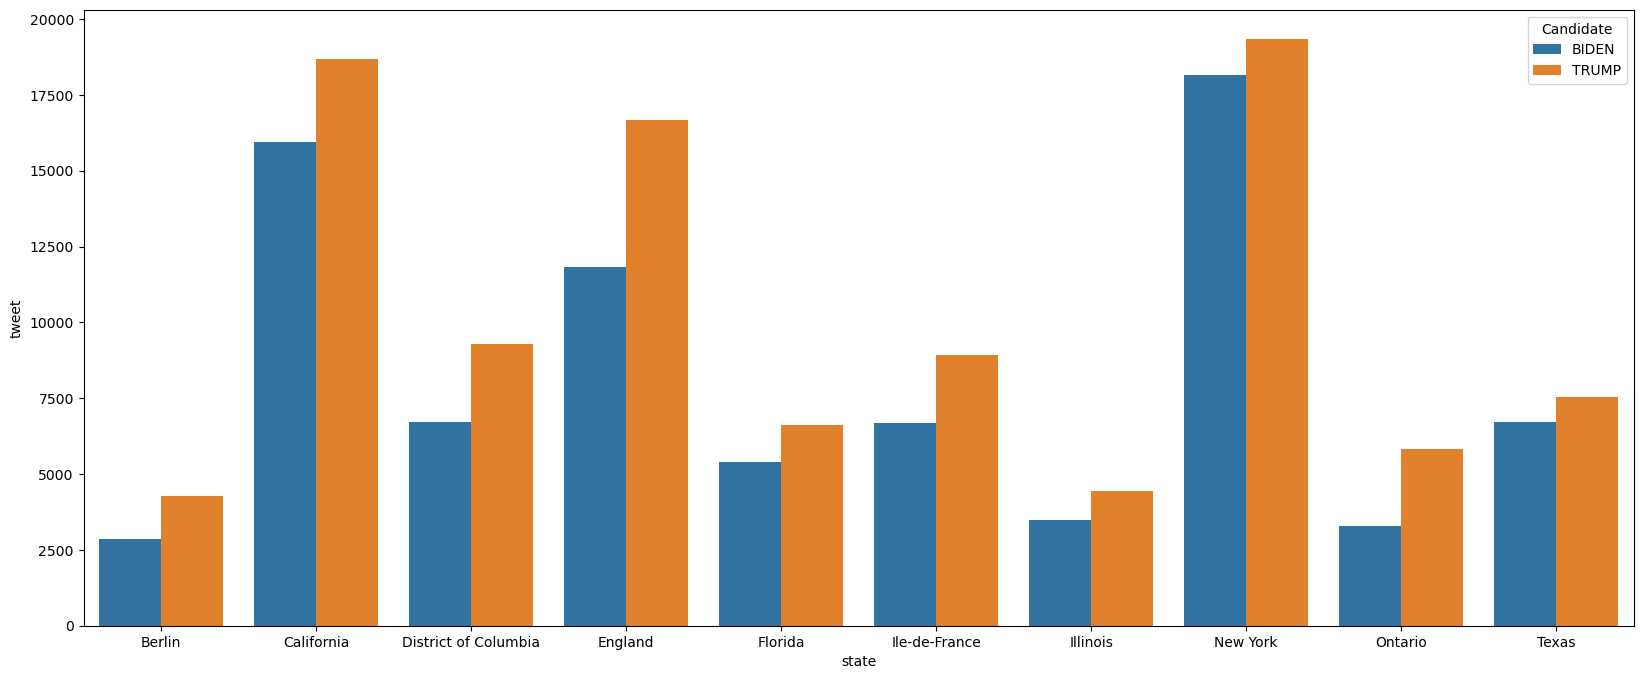

In [42]:
#Plot top 10 states with highest number of tweets for trump and biden
plt.figure(figsize=(20,8))
sns.barplot(data=state_df,x='state',y='tweet',hue='Candidate')
plt.show()

In [43]:
#Even here the tweets are more for trump than Biden

# Sentiment Analysis 

In [44]:
#We will be considering sentiments of only US people here as they are the major factor that decide the president of United States

In [45]:
def clean(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text=re.sub(r'[^A-Za-z]+', ' ', text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'[^\w]', ' ', text)
  
    return text

In [46]:
# create fuction to get the subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'

# 

# 

# Donald Trump tweets sentiment analysis

In [47]:
Data_Mixed.columns

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at', 'Candidate'],
      dtype='object')

In [48]:
Trump_Tweets = Data_Mixed.query('(Candidate == "TRUMP")').sort_values('user_followers_count',ascending = False).drop_duplicates(['user_name'])[['tweet','country','likes','retweet_count','user_followers_count']]


In [49]:
Trump_Tweets.head()

,tweet,country,likes,retweet_count,user_followers_count
313607,@libforlife1 @NowisHappening1 Christian mainst...,United States of America,0.0,0.0,9998.0
960433,Alles was #Trump nun noch tut oder twittert di...,Germany,26.0,4.0,9997.0
727661,"âCorrupciÃ³nâ, âhistoria de terrorâ\nâ...",Spain,100.0,18.0,99966.0
500986,NEW #Election2020 #ClimateCrisis episode I mad...,United States of America,2.0,2.0,9996.0
853324,#JoeBiden derrota a #DonaldTrump y gana las el...,Peru,22.0,2.0,99955.0


In [50]:
Trump_Tweets = Trump_Tweets.dropna().loc[Trump_Tweets.country == 'United States of America']

In [51]:
Trump_Tweets.head(2)

,tweet,country,likes,retweet_count,user_followers_count
313607,@libforlife1 @NowisHappening1 Christian mainst...,United States of America,0.0,0.0,9998.0
500986,NEW #Election2020 #ClimateCrisis episode I mad...,United States of America,2.0,2.0,9996.0


In [52]:
Trump_Tweets.reset_index(inplace = True, drop = True)

In [53]:
Trump_Tweets.head(3)

,tweet,country,likes,retweet_count,user_followers_count
0,@libforlife1 @NowisHappening1 Christian mainst...,United States of America,0.0,0.0,9998.0
1,NEW #Election2020 #ClimateCrisis episode I mad...,United States of America,2.0,2.0,9996.0
2,Trump losing voters in rural areas he needs to...,United States of America,1.0,1.0,9990.0


In [54]:
Trump_Tweets['ClearTweet'] = Trump_Tweets['tweet'].apply(clean)

In [55]:
Trump_Tweets['subjectivity']= Trump_Tweets['ClearTweet'].apply(getSubjectivity)
Trump_Tweets['polarity']    = Trump_Tweets['ClearTweet'].apply(getPolarity)
Trump_Tweets['analysis']    = Trump_Tweets['polarity'].apply(getAnalysis)


In [56]:
Trump_Tweets.head(3)

,tweet,country,likes,retweet_count,user_followers_count,ClearTweet,subjectivity,polarity,analysis
0,@libforlife1 @NowisHappening1 Christian mainst...,United States of America,0.0,0.0,9998.0,christian mainstream never backed trump fakec...,0.166667,0.000000,neutral
1,NEW #Election2020 #ClimateCrisis episode I mad...,United States of America,2.0,2.0,9996.0,new climatecrisis episode i made for therealne...,0.418182,0.145455,positive
2,Trump losing voters in rural areas he needs to...,United States of America,1.0,1.0,9990.0,trump losing voters in rural areas he needs to...,0.260000,0.220000,positive


In [57]:
Trump_Tweets.analysis.value_counts(normalize=True)*100

neutral     42.847714
positive    36.868042
negative    20.284243
Name: analysis, dtype: float64

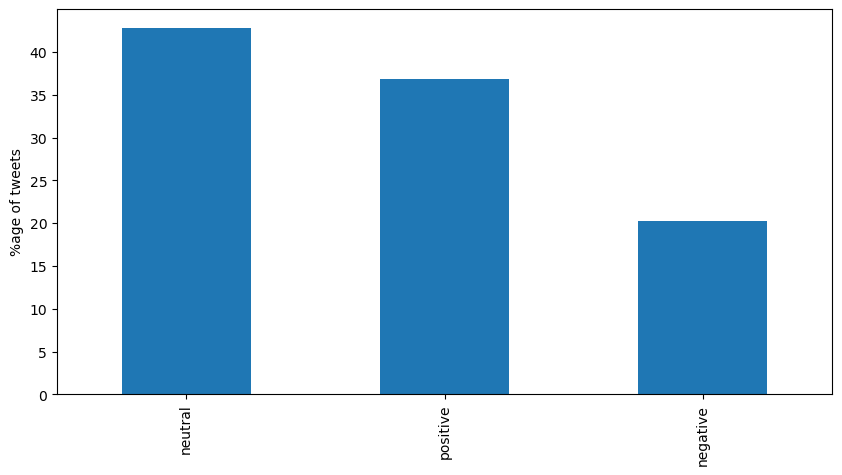

In [58]:
# Plot graph for analysis of Trump Tweets
plt.figure(figsize=(10,5)) 
(Trump_Tweets.analysis.value_counts(normalize=True)*100).plot.bar()
plt.ylabel("%age of tweets")
plt.show()

In [59]:
Trump_Tweets['user_followers_count'] = pd.to_numeric(Trump_Tweets['user_followers_count'], errors='coerce')

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler=MinMaxScaler()
Trump_Tweets[["user_followers_count","likes","retweet_count"]]=scaler.fit_transform(Trump_Tweets[["user_followers_count","likes","retweet_count"]])

In [62]:
Trump_Tweets.head(1)

,tweet,country,likes,retweet_count,user_followers_count,ClearTweet,subjectivity,polarity,analysis
0,@libforlife1 @NowisHappening1 Christian mainst...,United States of America,0.0,0.0,0.00174,christian mainstream never backed trump fakec...,0.166667,0.0,neutral


In [63]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,ComplementNB
from sklearn.metrics import accuracy_score

In [64]:
# Vectorize the data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Trump_Tweets["ClearTweet"])
y = Trump_Tweets['analysis']

In [65]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [67]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.675318961724593


In [68]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


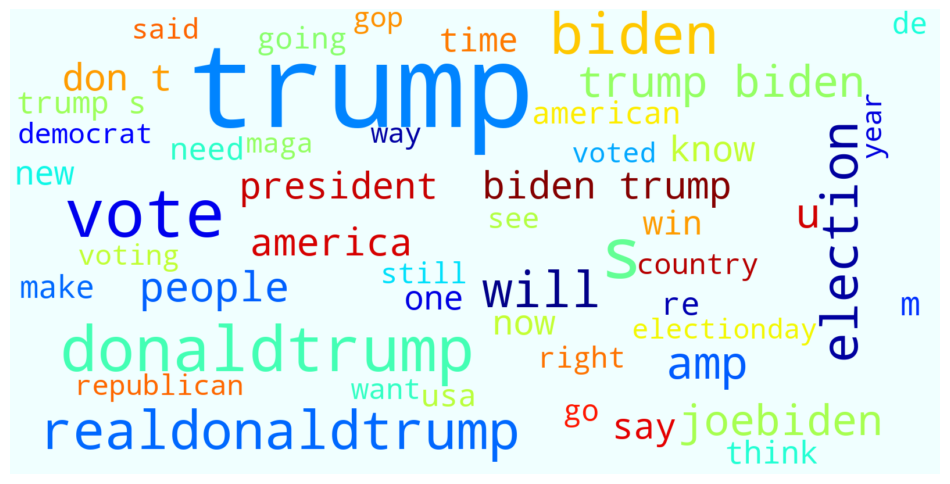

In [69]:
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='Azure',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(Trump_Tweets['ClearTweet'][:5000])

In [70]:
# Alternate method

In [71]:
from nltk.corpus import stopwords

In [72]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [73]:
#Generating TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
tfidf=vectorizer.fit_transform(Trump_Tweets['ClearTweet'])

In [74]:
tfidf.shape

(22727, 37773)

In [75]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(Trump_Tweets.analysis)
le.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

In [76]:
int_class=le.transform(Trump_Tweets.analysis)
int_class

array([1, 2, 2, ..., 2, 1, 1])

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB

In [78]:
xtrain,xtest,ytrain,ytest=train_test_split(tfidf,int_class,random_state=0)
classifier=ComplementNB().fit(xtrain,ytrain)

In [79]:
#prediction
from sklearn import metrics
predictions=classifier.predict(xtest)

In [80]:
#confusion matrix
metrics.confusion_matrix(ytest,predictions)

array([[ 498,   84,  566],
       [ 206, 1436,  793],
       [  34,  125, 1940]], dtype=int64)

In [81]:
#accuracy score
metrics.accuracy_score(ytest,predictions)

0.6818021823301654

In [82]:
#predict with the whole thing
predictions1=classifier.predict(tfidf)

In [83]:
#confusion matrix on entire data
metrics.confusion_matrix(int_class,predictions1)

array([[3015,  187, 1408],
       [ 287, 7390, 2061],
       [  45,  238, 8096]], dtype=int64)

In [84]:
#accuracy score on entire data
metrics.accuracy_score(int_class,predictions1)

0.8140537686452237

#  

#   

# JoeBiden tweets sentiment analysis

In [85]:
print(Data_Mixed.dtypes)

created_at              datetime64[ns]
tweet_id                        object
tweet                           object
likes                          float64
retweet_count                  float64
source                          object
user_id                         object
user_name                       object
user_screen_name                object
user_description                object
user_join_date                  object
user_followers_count            object
user_location                   object
lat                             object
long                            object
city                            object
country                         object
continent                       object
state                           object
state_code                      object
collected_at                    object
Candidate                       object
dtype: object


In [86]:
Biden_Tweets = Data_Mixed.query('(Candidate == "BIDEN")').dropna(subset=['country']).sort_values('user_followers_count', ascending=False).drop_duplicates(['user_name'])[['tweet','country','likes','retweet_count','user_followers_count']]

In [87]:
Biden_Tweets.head(2)

,tweet,country,likes,retweet_count,user_followers_count
726066,Signs of US becoming a failed state\n\n#JoeBid...,India,77.0,7.0,13216354.0
769064,ØµØ¨Ø§Ø­ Ø§ÙÙØ²ÙÙ Ø© ÙØ§ÙÙØµØ±.. #ØªØ±Ø§...,United Arab Emirates,122.0,15.0,12034151.0


In [88]:
Biden_Tweets = Biden_Tweets.dropna().loc[Biden_Tweets.country == 'United States of America']

In [89]:
Biden_Tweets.head(2)

,tweet,country,likes,retweet_count,user_followers_count
175650,#JoeBiden is enlisting A-list star power to he...,United States of America,73.0,4.0,5750841.0
735142,While we were campaigning across battleground ...,United States of America,717.0,55.0,5477365.0


In [90]:
Biden_Tweets.reset_index(inplace = True, drop = True)

In [91]:
Biden_Tweets['ClearTweet'] = Biden_Tweets['tweet'].apply(clean)

In [92]:
Biden_Tweets['subjectivity']= Biden_Tweets['ClearTweet'].apply(getSubjectivity)
Biden_Tweets['polarity']    = Biden_Tweets['ClearTweet'].apply(getPolarity)
Biden_Tweets['analysis']    = Biden_Tweets['polarity'].apply(getAnalysis)


In [93]:
Biden_Tweets.head(2)


,tweet,country,likes,retweet_count,user_followers_count,ClearTweet,subjectivity,polarity,analysis
0,#JoeBiden is enlisting A-list star power to he...,United States of America,73.0,4.0,5750841.0,joebiden is enlisting a list star power to he...,0.00,0.0,neutral
1,While we were campaigning across battleground ...,United States of America,717.0,55.0,5477365.0,while we were campaigning across battleground ...,0.75,0.8,positive


In [94]:
Biden_Tweets.analysis.value_counts(normalize=True)*100

neutral     44.885599
positive    41.019515
negative    14.094886
Name: analysis, dtype: float64

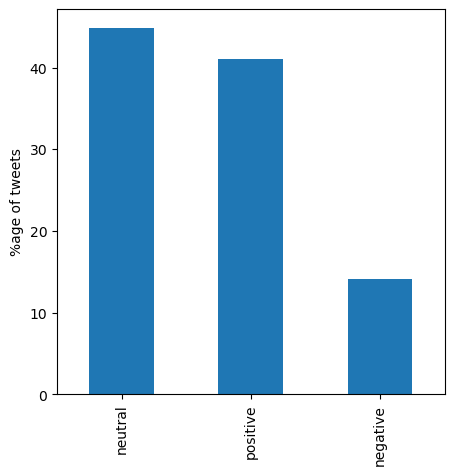

In [95]:
# Plot graph for analysis of Biden Tweets
plt.figure(figsize=(5,5)) 
(Biden_Tweets.analysis.value_counts(normalize=True)*100).plot.bar()
plt.ylabel("%age of tweets")
plt.show()

In [96]:
#Just Comparing the positive and negative tweets itself shows that Biden was favourite for winning presidential elections

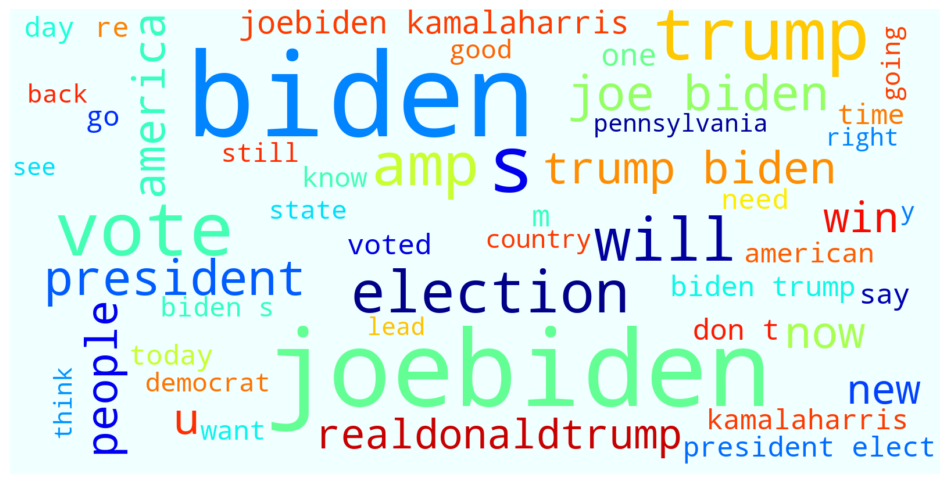

In [97]:
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='azure',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(Biden_Tweets['ClearTweet'][0:5000])

In [98]:
#According to Sentiment Analysis, Biden has upper hand over Trump in US which actually matters in presidential elections

In [99]:
scaler=MinMaxScaler()
Biden_Tweets[["user_followers_count","likes","retweet_count"]]=scaler.fit_transform(Biden_Tweets[["user_followers_count","likes","retweet_count"]])

In [100]:
# Vectorize the data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Biden_Tweets["ClearTweet"])
y = Biden_Tweets['analysis']

In [101]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [103]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7143337819650067


In [104]:
#Alternate method

In [105]:
lemmatizer=WordNetLemmatizer()

In [106]:
vectorizer=TfidfVectorizer()
tfidf=vectorizer.fit_transform(Biden_Tweets['ClearTweet'])

In [107]:
le=preprocessing.LabelEncoder()
le.fit(Biden_Tweets.analysis)
le.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

In [108]:
int_class=le.transform(Biden_Tweets.analysis)
int_class

array([1, 2, 1, ..., 2, 2, 1])

In [109]:
xtrain,xtest,ytrain,ytest=train_test_split(tfidf,int_class,random_state=0)
classifier=ComplementNB().fit(xtrain,ytrain)

In [110]:
predictions=classifier.predict(xtest)

In [111]:
#confusion matrix
metrics.confusion_matrix(ytest,predictions)

array([[ 327,   72,  631],
       [ 244, 1966, 1181],
       [  50,  115, 2844]], dtype=int64)

In [112]:
#accuracy score
metrics.accuracy_score(ytest,predictions)

0.691386271870794

In [113]:
#predict with the whole thing
predictions1=classifier.predict(tfidf)

In [114]:
#confusion matrix on entire data
metrics.confusion_matrix(int_class,predictions1)

array([[ 2035,   202,  1952],
       [  288,  9701,  3351],
       [   63,   248, 11880]], dtype=int64)

In [115]:
#accuracy score on entire data
metrics.accuracy_score(int_class,predictions1)

0.7946164199192463

# 

# 

# 

In [116]:
Trump_Tweets.head(1)

,tweet,country,likes,retweet_count,user_followers_count,ClearTweet,subjectivity,polarity,analysis
0,@libforlife1 @NowisHappening1 Christian mainst...,United States of America,0.0,0.0,0.00174,christian mainstream never backed trump fakec...,0.166667,0.0,neutral


In [117]:
Trump_Tweets.columns

Index(['tweet', 'country', 'likes', 'retweet_count', 'user_followers_count',
       'ClearTweet', 'subjectivity', 'polarity', 'analysis'],
      dtype='object')

In [118]:
le = LabelEncoder() 
  
Trump_Tweets['analysis']= le.fit_transform(Trump_Tweets['analysis']) 

In [119]:
Trump_Tweets.head()

,tweet,country,likes,retweet_count,user_followers_count,ClearTweet,subjectivity,polarity,analysis
0,@libforlife1 @NowisHappening1 Christian mainst...,United States of America,0.000000,0.000000,0.001740,christian mainstream never backed trump fakec...,0.166667,0.000000,1
1,NEW #Election2020 #ClimateCrisis episode I mad...,United States of America,0.000027,0.000098,0.001739,new climatecrisis episode i made for therealne...,0.418182,0.145455,2
2,Trump losing voters in rural areas he needs to...,United States of America,0.000013,0.000049,0.001738,trump losing voters in rural areas he needs to...,0.260000,0.220000,2
3,"Amazing Hot Take by #BBCNews on US ""Democracy""...",United States of America,0.000000,0.000000,0.000174,amazing hot take by bbcnews on us democracy in...,0.712500,0.237500,2
4,@theGrio I wish #Biden had turned to #Trump in...,United States of America,0.000000,0.000000,0.000174,thegrio i wish biden had turned to trump in m...,0.687500,-0.312500,0


In [120]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

Trump_Tweets['Processed_Tweet']=Trump_Tweets.tweet.apply(remove_emoji)

In [121]:
count = 0
for i in Trump_Tweets['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        Trump_Tweets.drop(Trump_Tweets.loc[Trump_Tweets['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

12

In [122]:
mask = Trump_Tweets['Processed_Tweet'].str.startswith('RT')
count = mask.sum()
Trump_Tweets = Trump_Tweets[~mask]  # create a new dataframe without the rows that start with "RT"

print(count)  # should output the number of rows that were removed

0


In [123]:
#The above code is to ensure that there are no retweets in our dataset. Using Regex, this has been confirmed.

In [124]:
Trump_Tweets.shape

(22715, 10)

In [125]:
Trump_Tweets['Processed_Tweet']

0        @libforlife1 @NowisHappening1 Christian mainst...
1        NEW #Election2020 #ClimateCrisis episode I mad...
2        Trump losing voters in rural areas he needs to...
3        Amazing Hot Take by #BBCNews on US "Democracy"...
4        @theGrio I wish #Biden had turned to #Trump in...
                               ...                        
22722    #2020ElectionPrediction\n\n#Trump wins 300-320...
22723    Republicans and Democrats are the same animal....
22724    I don't understand the obsession over politics...
22725    #greta donald trump or biden\nRetweet for #Don...
22726    Never seen trump shirtless but i just know he ...
Name: Processed_Tweet, Length: 22715, dtype: object

# REMOVE RETWEETS

In [126]:
Trump_Tweets['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in Trump_Tweets['Processed_Tweet']]  #Remove RT substring

In [127]:
Trump_Tweets['Processed_Tweet']

0        @libforlife1 @NowisHappening1 Christian mainst...
1        NEW #Election2020 #ClimateCrisis episode I mad...
2        Trump losing voters in rural areas he needs to...
3        Amazing Hot Take by #BBCNews on US "Democracy"...
4        @theGrio I wish #Biden had turned to #Trump in...
                               ...                        
22722    #2020ElectionPrediction\n\n#Trump wins 300-320...
22723    Republicans and Democrats are the same animal....
22724    I don't understand the obsession over politics...
22725    #greta donald trump or biden\nRetweet for #Don...
22726    Never seen trump shirtless but i just know he ...
Name: Processed_Tweet, Length: 22715, dtype: object

# REMOVE USERNAME

In [128]:
Trump_Tweets['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in Trump_Tweets['Processed_Tweet']] #remove usernames

In [129]:
Trump_Tweets['Processed_Tweet']

0            Christian mainstream never backed #Trump\n...
1        NEW #Election2020 #ClimateCrisis episode I mad...
2        Trump losing voters in rural areas he needs to...
3        Amazing Hot Take by #BBCNews on US "Democracy"...
4          I wish #Biden had turned to #Trump in mock s...
                               ...                        
22722    #2020ElectionPrediction\n\n#Trump wins 300-320...
22723    Republicans and Democrats are the same animal....
22724    I don't understand the obsession over politics...
22725    #greta donald trump or biden\nRetweet for #Don...
22726    Never seen trump shirtless but i just know he ...
Name: Processed_Tweet, Length: 22715, dtype: object

# REMOVE URL

In [130]:
Trump_Tweets['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in Trump_Tweets['Processed_Tweet']] #Remove urls

# Removing Hashtags & Keeping The Word

In [131]:
Trump_Tweets['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in Trump_Tweets['Processed_Tweet']] # remove the # in #hashtag

In [132]:
Trump_Tweets['Processed_Tweet']

0            Christian mainstream never backed Trump\n\...
1        NEW Election2020 ClimateCrisis episode I made ...
2        Trump losing voters in rural areas he needs to...
3        Amazing Hot Take by BBCNews on US "Democracy" ...
4          I wish Biden had turned to Trump in mock sur...
                               ...                        
22722    2020ElectionPrediction\n\nTrump wins 300-320 e...
22723    Republicans and Democrats are the same animal....
22724    I don't understand the obsession over politics...
22725    greta donald trump or biden\nRetweet for Donal...
22726    Never seen trump shirtless but i just know he ...
Name: Processed_Tweet, Length: 22715, dtype: object

# Using Preprocessor Library

In [133]:
import preprocessor as p #Module for faster preprocessing specifically for tweets

In [134]:
Trump_Tweets['Processed_Tweet'] = [p.clean(i) for i in Trump_Tweets['Processed_Tweet']]

In [135]:
Trump_Tweets['Processed_Tweet']

0        Christian mainstream never backed Trump FakeCh...
1        NEW Election2020 ClimateCrisis episode I made ...
2        Trump losing voters in rural areas he needs to...
3        Amazing Hot Take by BBCNews on US "Democracy" ...
4        I wish Biden had turned to Trump in mock surpr...
                               ...                        
22722    ElectionPrediction Trump wins -320 electoral v...
22723    Republicans and Democrats are the same animal....
22724    I don't understand the obsession over politics...
22725    greta donald trump or biden Retweet for Donald...
22726    Never seen trump shirtless but i just know he ...
Name: Processed_Tweet, Length: 22715, dtype: object

# Removing Any Special Characters, Numbers, Punctuations etc.

In [136]:
#removing unnecessary special characters, numbers, punctuations in tweets
Trump_Tweets.Processed_Tweet = Trump_Tweets.Processed_Tweet.str.replace("[^a-zA-Z]", " ")

C:\Users\karth\AppData\Local\Temp\ipykernel_1804\1913325476.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Trump_Tweets.Processed_Tweet = Trump_Tweets.Processed_Tweet.str.replace("[^a-zA-Z]", " ")


# Converting To Lower Case

In [137]:
Trump_Tweets.Processed_Tweet = [low.lower() for low in Trump_Tweets.Processed_Tweet] #Converting into lower case 

In [138]:
Trump_Tweets['Processed_Tweet']

0        christian mainstream never backed trump fakech...
1        new election     climatecrisis episode i made ...
2        trump losing voters in rural areas he needs to...
3        amazing hot take by bbcnews on us  democracy  ...
4        i wish biden had turned to trump in mock surpr...
                               ...                        
22722    electionprediction trump wins      electoral v...
22723    republicans and democrats are the same animal ...
22724    i don t understand the obsession over politics...
22725    greta donald trump or biden retweet for donald...
22726    never seen trump shirtless but i just know he ...
Name: Processed_Tweet, Length: 22715, dtype: object

In [139]:
Trump_Tweets.Processed_Tweet =  Trump_Tweets.Processed_Tweet.str.replace("amp", "")

In [140]:
Trump_Tweets['Processed_Tweet'][12] #Sample tweet


'donaldtrump is about to pack up his blue suits and tupay s and vacate the premises   lol election     electionday'

In [141]:
from nltk.tokenize import TweetTokenizer

In [142]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

# Removing Stop Words

In [143]:
Trump_Tweets.head(2)

,tweet,country,likes,retweet_count,user_followers_count,ClearTweet,subjectivity,polarity,analysis,Processed_Tweet
0,@libforlife1 @NowisHappening1 Christian mainst...,United States of America,0.000000,0.000000,0.001740,christian mainstream never backed trump fakec...,0.166667,0.000000,1,christian mainstream never backed trump fakech...
1,NEW #Election2020 #ClimateCrisis episode I mad...,United States of America,0.000027,0.000098,0.001739,new climatecrisis episode i made for therealne...,0.418182,0.145455,2,new election climatecrisis episode i made ...


In [144]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['is', "you'll", 'hers', 'me', 'its', 'itself', 'mustn', 'should', 'between', 'haven', 'had', 'very', 'and', 't', 'out', "wouldn't", "you'd", 'an', 'a', 'if', 'did', 'am', 'can', 'on', 'there', 'other', 'of', 'shan', 'no', 'until', 'ours', 'how', 'then', 'most', 'hasn', 'o', 'after', 'don', 'at', 'into', 'over', 'as', 'further', 'from', 'with', "that'll", 'down', 'it', 'who', 'where', "wasn't", 'their', 'themselves', "it's", 'these', 'will', "didn't", 'this', "hasn't", "weren't", 'his', "hadn't", 'up', 'same', "you're", 'ma', 'those', 'the', 'yours', 'against', 'which', 'more', 'below', 'shouldn', 'do', 'for', 'in', 'were', 'all', 'to', 're', 'any', 'yourselves', "isn't", 'him', 'was', 'having', 'but', 'before', 'theirs', 'once', 'while', 'during', 'being', 'myself', 'y', 'needn', 'few', 'that', 'has', 'only', 'own', 'doesn', 'them', "should've", "shouldn't", 'they', 'whom', 'again', "needn't", 'll', "doesn't", 'himself', 'i', 'herself', 'wouldn', 'couldn', "you've", 'we', 'than', "are

In [145]:
Trump_Tweets['Processed_Tweet'] = Trump_Tweets.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords

In [146]:
Trump_Tweets['Processed_Tweet']

0        christian mainstream never backed trump fakech...
1        new election climatecrisis episode made w go w...
2        trump losing voters rural areas needs win pres...
3        amazing hot take bbcnews us democracy action e...
4        wish biden turned trump mock surprise mean abr...
                               ...                        
22722    electionprediction trump wins electoral votes ...
22723    republicans democrats animal scums trump elect...
22724    understand obsession politics america life hel...
22725    greta donald trump biden retweet donaldtrump l...
22726    never seen trump shirtless know looks like mel...
Name: Processed_Tweet, Length: 22715, dtype: object

# Tokenizing

In [147]:
Trump_Tweets['Processed_Tweet'] = Trump_Tweets['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))

In [148]:
Trump_Tweets['Processed_Tweet']

0        [christian, mainstream, never, backed, trump, ...
1        [new, election, climatecrisis, episode, made, ...
2        [trump, losing, voters, rural, areas, needs, w...
3        [amazing, hot, take, bbcnews, us, democracy, a...
4        [wish, biden, turned, trump, mock, surprise, m...
                               ...                        
22722    [electionprediction, trump, wins, electoral, v...
22723    [republicans, democrats, animal, scums, trump,...
22724    [understand, obsession, politics, america, lif...
22725    [greta, donald, trump, biden, retweet, donaldt...
22726    [never, seen, trump, shirtless, know, looks, l...
Name: Processed_Tweet, Length: 22715, dtype: object

# Stemming

In [149]:
from nltk.stem import PorterStemmer

In [150]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)

In [151]:
Trump_Tweets['Processed_Tweet'] = Trump_Tweets['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming

In [152]:
Trump_Tweets['Processed_Tweet']

0        [christian, mainstream, never, back, trump, fa...
1        [new, elect, climatecrisi, episod, made, w, go...
2        [trump, lose, voter, rural, area, need, win, p...
3        [amaz, hot, take, bbcnew, us, democraci, actio...
4        [wish, biden, turn, trump, mock, surpris, mean...
                               ...                        
22722    [electionpredict, trump, win, elector, vote, m...
22723    [republican, democrat, anim, scum, trump, elec...
22724    [understand, obsess, polit, america, life, hel...
22725    [greta, donald, trump, biden, retweet, donaldt...
22726    [never, seen, trump, shirtless, know, look, li...
Name: Processed_Tweet, Length: 22715, dtype: object

In [153]:
Trump_Tweets['Processed_Tweet'] = Trump_Tweets.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])

In [154]:
Trump_Tweets.head(2)

,tweet,country,likes,retweet_count,user_followers_count,ClearTweet,subjectivity,polarity,analysis,Processed_Tweet
0,@libforlife1 @NowisHappening1 Christian mainst...,United States of America,0.000000,0.000000,0.001740,christian mainstream never backed trump fakec...,0.166667,0.000000,1,"[christian, mainstream, never, back, trump, fa..."
1,NEW #Election2020 #ClimateCrisis episode I mad...,United States of America,0.000027,0.000098,0.001739,new climatecrisis episode i made for therealne...,0.418182,0.145455,2,"[new, elect, climatecrisi, episod, made, way, ..."


In [155]:
#Creating strings for each tweet for putting in the model

In [156]:
texts = []
texts = Trump_Tweets.Processed_Tweet.apply(lambda x: [i for i in x] )

In [157]:
all_words = []
for i in texts:
    all_words.append(" ".join(i))

In [158]:
text = []
for i in texts:
    for j in i:
        text.append(j)

In [159]:
len(text)

288973

In [160]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))

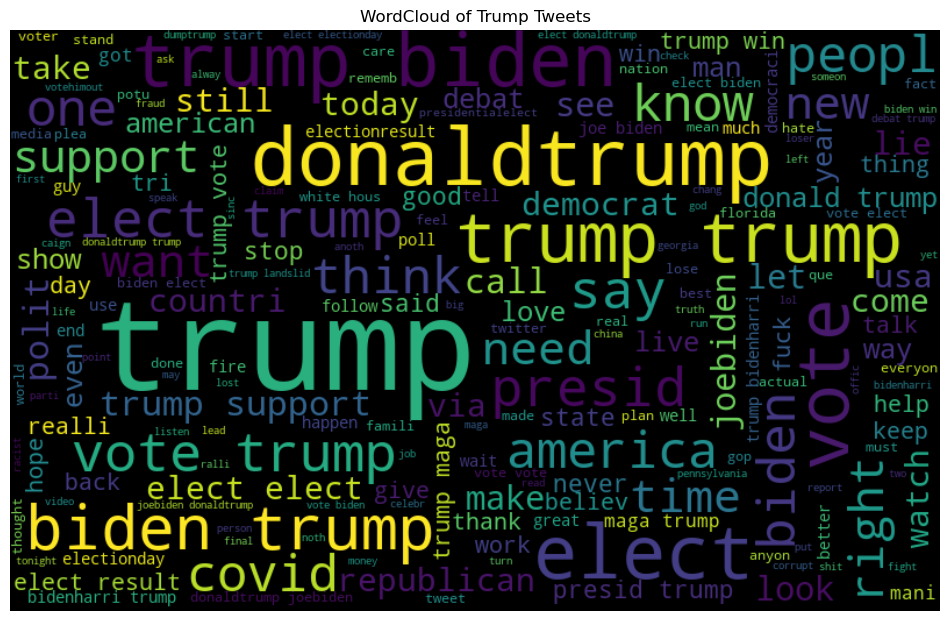

In [161]:
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of Trump Tweets")
plt.show()

# Sentiment Analysis

In [162]:
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)

In [163]:
len(pol)

22715

In [164]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = Trump_Tweets['analysis']

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

# Decision Tree

In [166]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [167]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.7558327219369039
Precision Score:  0.7558327219369039
Recall Score:  0.7558327219369039
F1 Score:  0.7558327219369039


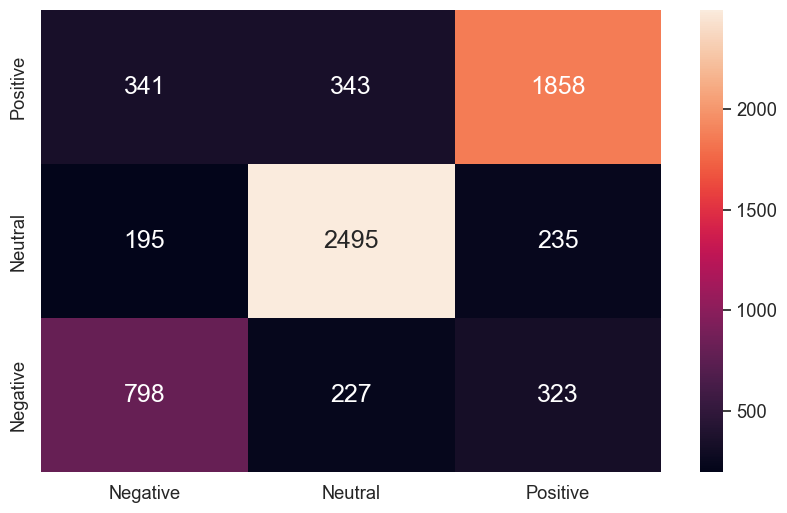

In [168]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

      # neg # neutr  # pos
# pos #  232   65      1397
# neu #  87   1175     51
# neg # 1104   82      321

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

# Hyperparameter Tuning For Decision Trees

In [169]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [170]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [171]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.5642767295597484
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': 8, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [172]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.5649303008070433
Precision Score:  0.5649303008070433
Recall Score:  0.5649303008070433
F1 Score:  0.5649303008070433


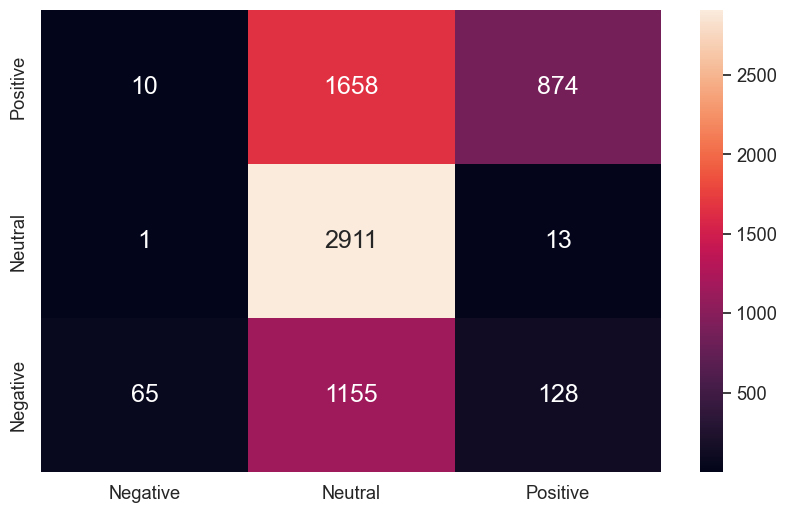

In [173]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

      # neg # neutr  # pos
# pos #  0    920      774
# neu #  0   1311       2
# neg #  7    1210     290

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

# Random Forest

In [526]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [527]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.7980924431401321
Precision Score:  0.7980924431401321
Recall Score:  0.7980924431401321
F1 Score:  0.7980924431401321


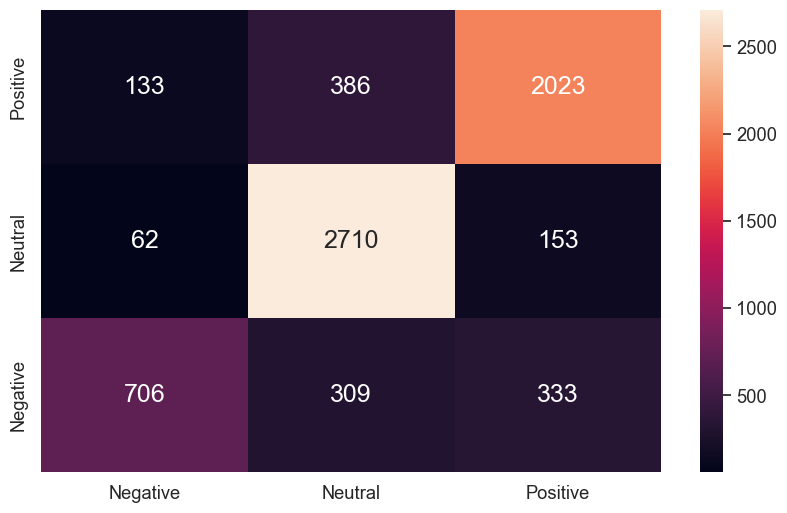

In [528]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

      # neg # neutr  # pos
# pos # 198    92     1404
# neu #  53   1233      27
# neg # 1120   121     266

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

# Hyperparameter Tuning For Random Forest

In [529]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [530]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

In [531]:
classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START criterion=gini, max_depth=17, n_estimators=200.............
[CV 1/5; 1/10] END criterion=gini, max_depth=17, n_estimators=200;, score=0.675 total time=  19.9s
[CV 2/5; 1/10] START criterion=gini, max_depth=17, n_estimators=200.............
[CV 2/5; 1/10] END criterion=gini, max_depth=17, n_estimators=200;, score=0.677 total time=  20.4s
[CV 3/5; 1/10] START criterion=gini, max_depth=17, n_estimators=200.............
[CV 3/5; 1/10] END criterion=gini, max_depth=17, n_estimators=200;, score=0.668 total time=  20.9s
[CV 4/5; 1/10] START criterion=gini, max_depth=17, n_estimators=200.............
[CV 4/5; 1/10] END criterion=gini, max_depth=17, n_estimators=200;, score=0.679 total time=  21.1s
[CV 5/5; 1/10] START criterion=gini, max_depth=17, n_estimators=200.............
[CV 5/5; 1/10] END criterion=gini, max_depth=17, n_estimators=200;, score=0.683 total time=  19.0s
[CV 1/5; 2/10] START criterion=entropy,

[CV 1/5; 10/10] END criterion=entropy, max_depth=2, n_estimators=1000;, score=0.458 total time=  14.1s
[CV 2/5; 10/10] START criterion=entropy, max_depth=2, n_estimators=1000.........
[CV 2/5; 10/10] END criterion=entropy, max_depth=2, n_estimators=1000;, score=0.457 total time=  14.1s
[CV 3/5; 10/10] START criterion=entropy, max_depth=2, n_estimators=1000.........
[CV 3/5; 10/10] END criterion=entropy, max_depth=2, n_estimators=1000;, score=0.461 total time=  14.1s
[CV 4/5; 10/10] START criterion=entropy, max_depth=2, n_estimators=1000.........
[CV 4/5; 10/10] END criterion=entropy, max_depth=2, n_estimators=1000;, score=0.458 total time=  14.2s
[CV 5/5; 10/10] START criterion=entropy, max_depth=2, n_estimators=1000.........
[CV 5/5; 10/10] END criterion=entropy, max_depth=2, n_estimators=1000;, score=0.461 total time=  14.0s
0.6766037735849058
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 17, 'max_features': 'auto', 'max_leaf_nodes': No

In [532]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.6708730741012473
Precision Score:  0.6708730741012473
Recall Score:  0.6708730741012473
F1 Score:  0.6708730741012473


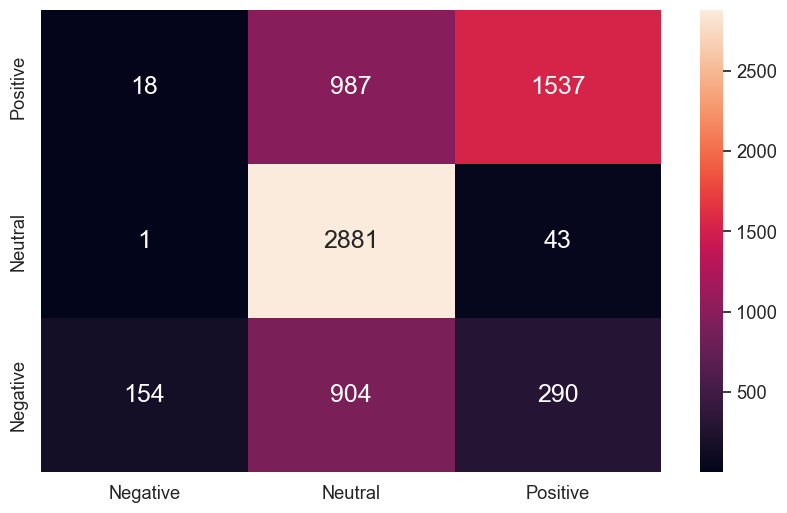

In [533]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

      # neg # neutr  # pos
# pos #  89    246     1359
# neu #  43   1253     17
# neg #  917   292     298

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

# Naive Bayes

In [534]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

In [535]:
accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.7517241379310344
Precision Score:  0.7517241379310344
Recall Score:  0.7517241379310344
F1 Score:  0.7517241379310344


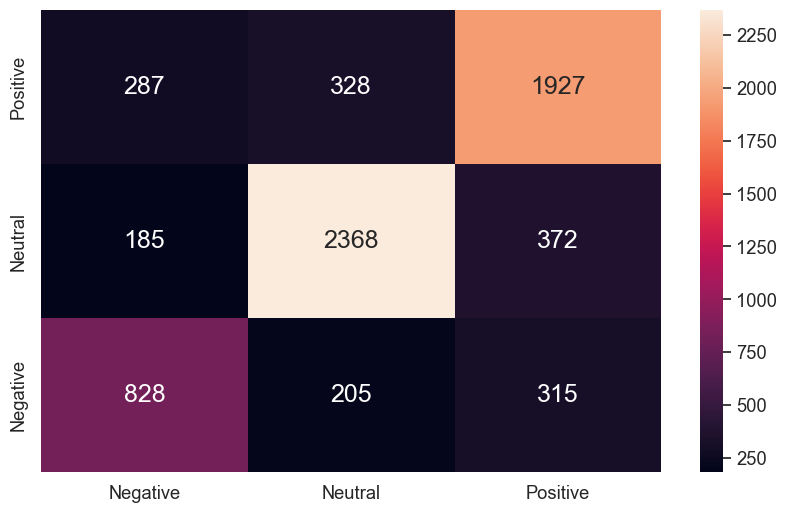

In [536]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

      # neg # neutr  # pos
# pos # 202    133     1359
# neu # 137   931      245
# neg # 1076  160      271

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()


# Hyperparameter Tuning For Naive Bayes

In [537]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [538]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

In [539]:
classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.7494339622641509
{'alpha': 1, 'class_prior': None, 'fit_prior': True}


In [540]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.7517241379310344
Precision Score:  0.7517241379310344
Recall Score:  0.7517241379310344
F1 Score:  0.7517241379310344


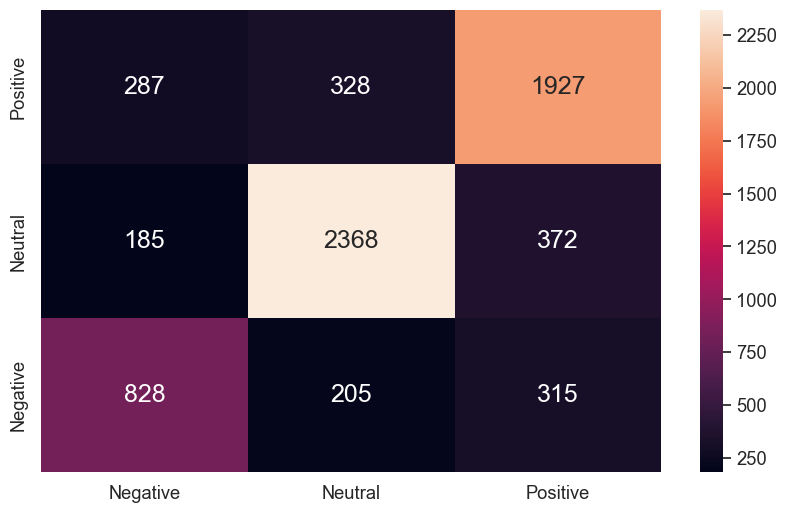

In [541]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

      # neg # neutr  # pos
# pos #  202   133     1359
# neu #  137   931     245
# neg #  1076  160     271

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

# Comparing The Models

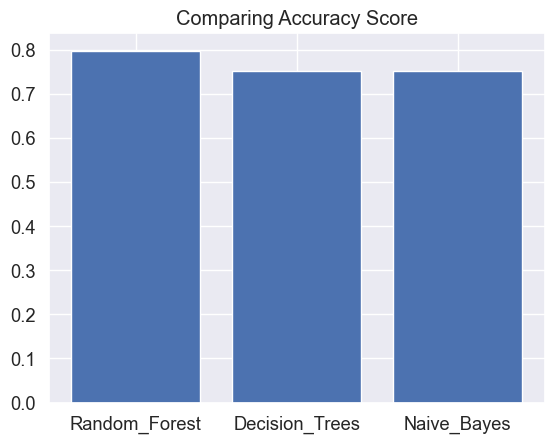

In [542]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()


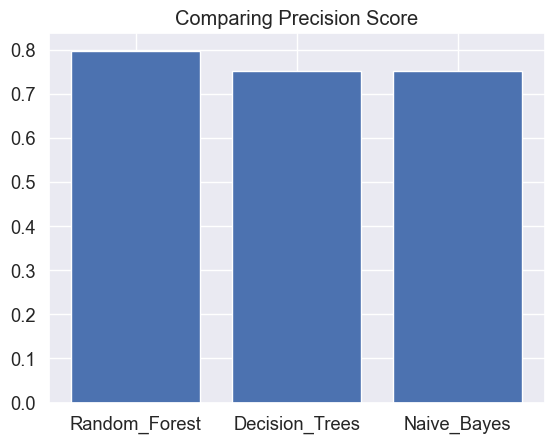

In [543]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

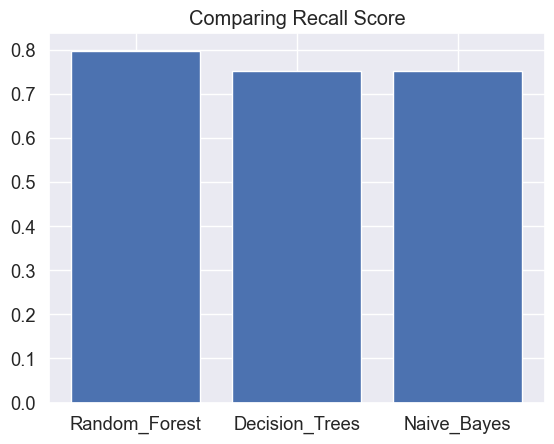

In [544]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

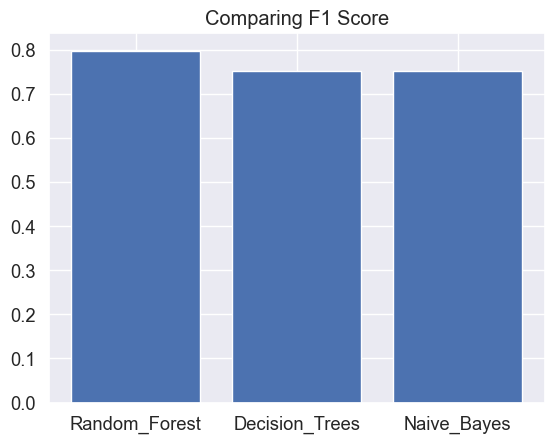

In [545]:
F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()

In [546]:
#It's evident that Random_Forest is workig the best among the three models used.

In [547]:
Data_Mixed.columns

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at', 'Candidate'],
      dtype='object')

In [548]:
Data_Mixed=Data_Mixed.drop(['created_at', 'tweet_id', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],axis=1)

In [549]:
Data_Mixed.head()

,tweet,Candidate
2,"#Trump: As a student I used to hear for years,...",TRUMP
4,You get a tie! And you get a tie! #Trump âs ...,TRUMP
11,"In 2020, #NYPost is being #censorship #CENSORE...",TRUMP
12,#Trump #PresidentTrump #Trump2020LandslideVict...,TRUMP
13,@Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...,TRUMP


In [550]:
#Data_Mixed['Clear_Tweet'] = [p.clean(i) for i in Data_Mixed['tweet']]

In [551]:
Data_Mixed.head(2)

,tweet,Candidate
2,"#Trump: As a student I used to hear for years,...",TRUMP
4,You get a tie! And you get a tie! #Trump âs ...,TRUMP


In [552]:
Data_Mixed['Clear_Tweet'] = Data_Mixed.tweet.apply(clean)

In [553]:
Data_Mixed['Clear_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in Data_Mixed['Clear_Tweet']] # remove the # in #hashtag

In [554]:
Data_Mixed.head(2)

,tweet,Candidate,Clear_Tweet
2,"#Trump: As a student I used to hear for years,...",TRUMP,trump as a student i used to hear for years f...
4,You get a tie! And you get a tie! #Trump âs ...,TRUMP,you get a tie and you get a tie trump s rally ...


In [555]:
Data_Mixed['subjectivity']= Data_Mixed['Clear_Tweet'].apply(getSubjectivity)
Data_Mixed['polarity']    = Data_Mixed['Clear_Tweet'].apply(getPolarity)
Data_Mixed['analysis']    = Data_Mixed['polarity'].apply(getAnalysis)

In [556]:
Data_Mixed

,tweet,Candidate,Clear_Tweet,subjectivity,polarity,analysis
2,"#Trump: As a student I used to hear for years,...",TRUMP,trump as a student i used to hear for years f...,0.333333,0.333333,positive
4,You get a tie! And you get a tie! #Trump âs ...,TRUMP,you get a tie and you get a tie trump s rally ...,0.000000,0.000000,neutral
11,"In 2020, #NYPost is being #censorship #CENSORE...",TRUMP,in nypost is being censorship censored by twit...,0.678571,-0.148810,negative
12,#Trump #PresidentTrump #Trump2020LandslideVict...,TRUMP,trump presidenttrump maga kag america america...,0.750000,0.500000,positive
13,@Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...,TRUMP,susan hutch joebiden ukraine realdonaldtrump ...,0.000000,0.000000,neutral
...,...,...,...,...,...,...
776860,@BreitbartNews Like all normal dictators &amp;...,BIDEN,breitbartnews like all normal dictators amp a...,0.340000,-0.020000,negative
776861,#election #2020Elections #trump #biden https:/...,BIDEN,election trump biden,0.000000,0.000000,neutral
776865,@FLOTUS Iâm excited to have a FLOTUS whose v...,BIDEN,flotus i m excited to have a flotus whose vag...,0.750000,0.375000,positive
776869,No puede ser lo #Panazis como siempre sacando ...,BIDEN,no puede ser lo panazis como siempre sacando e...,0.425000,-0.250000,negative


In [558]:
sentiments = SentimentIntensityAnalyzer()
Data_Mixed["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in Data_Mixed["Clear_Tweet"]]
Data_Mixed["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in Data_Mixed["Clear_Tweet"]]
Data_Mixed["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in Data_Mixed["Clear_Tweet"]]

In [560]:
Data_Mixed.head()

,tweet,Candidate,Clear_Tweet,subjectivity,polarity,analysis,Positive,Negative,Neutral
2,"#Trump: As a student I used to hear for years,...",TRUMP,trump as a student i used to hear for years f...,0.333333,0.333333,positive,0.065,0.000,0.935
4,You get a tie! And you get a tie! #Trump âs ...,TRUMP,you get a tie and you get a tie trump s rally ...,0.000000,0.000000,neutral,0.000,0.000,1.000
11,"In 2020, #NYPost is being #censorship #CENSORE...",TRUMP,in nypost is being censorship censored by twit...,0.678571,-0.148810,negative,0.088,0.126,0.786
12,#Trump #PresidentTrump #Trump2020LandslideVict...,TRUMP,trump presidenttrump maga kag america america...,0.750000,0.500000,positive,0.236,0.000,0.764
13,@Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...,TRUMP,susan hutch joebiden ukraine realdonaldtrump ...,0.000000,0.000000,neutral,0.000,0.178,0.822


In [561]:
Data_Mixed = Data_Mixed.reset_index()

In [562]:
Data_Mixed.head()

,index,tweet,Candidate,Clear_Tweet,subjectivity,polarity,analysis,Positive,Negative,Neutral
0,2,"#Trump: As a student I used to hear for years,...",TRUMP,trump as a student i used to hear for years f...,0.333333,0.333333,positive,0.065,0.000,0.935
1,4,You get a tie! And you get a tie! #Trump âs ...,TRUMP,you get a tie and you get a tie trump s rally ...,0.000000,0.000000,neutral,0.000,0.000,1.000
2,11,"In 2020, #NYPost is being #censorship #CENSORE...",TRUMP,in nypost is being censorship censored by twit...,0.678571,-0.148810,negative,0.088,0.126,0.786
3,12,#Trump #PresidentTrump #Trump2020LandslideVict...,TRUMP,trump presidenttrump maga kag america america...,0.750000,0.500000,positive,0.236,0.000,0.764
4,13,@Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...,TRUMP,susan hutch joebiden ukraine realdonaldtrump ...,0.000000,0.000000,neutral,0.000,0.178,0.822


In [563]:
Data_Mixed=Data_Mixed.drop("index",axis=1)

In [564]:
Data_Mixed.head()

,tweet,Candidate,Clear_Tweet,subjectivity,polarity,analysis,Positive,Negative,Neutral
0,"#Trump: As a student I used to hear for years,...",TRUMP,trump as a student i used to hear for years f...,0.333333,0.333333,positive,0.065,0.000,0.935
1,You get a tie! And you get a tie! #Trump âs ...,TRUMP,you get a tie and you get a tie trump s rally ...,0.000000,0.000000,neutral,0.000,0.000,1.000
2,"In 2020, #NYPost is being #censorship #CENSORE...",TRUMP,in nypost is being censorship censored by twit...,0.678571,-0.148810,negative,0.088,0.126,0.786
3,#Trump #PresidentTrump #Trump2020LandslideVict...,TRUMP,trump presidenttrump maga kag america america...,0.750000,0.500000,positive,0.236,0.000,0.764
4,@Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...,TRUMP,susan hutch joebiden ukraine realdonaldtrump ...,0.000000,0.000000,neutral,0.000,0.178,0.822


In [566]:
Data_Mixed.to_csv(r"D:\New folder\Data_Mixed.csv",index=False)